In [105]:
import numpy as np
import scipy as sp
import pandas as pd
import cvxpy
import matplotlib.pyplot as plt




In [106]:
# disctitization time
Ts = 0.1

In [107]:
def simulating_system(initial_cond, system_input, system_parameters):
    
    states = np.zeros(shape = (2, np.size(system_input, 1)))
    # initial states
    states[:, [0]] = initial_cond
    
    for i in range(np.size(system_input, 1)-1):
        
        mumax = system_parameters[0]
        Ks = system_parameters[1]
        Y = system_parameters[2]
        
        X = states[0, i]
        S = states[1, i]
        
        q0 = system_input[0, i]
        
        states[0, i+1] = Ts * ((mumax*S*X/(Ks+S)) - q0*X) + X
        states[1, i+1] = Ts * (-((mumax/Y)*S*X/(Ks+S)) + q0*(2-S) ) + S

    return states





In [108]:
def generate_prbs_like_signal(array1, array2, NUM_STEPS):
    """
    Generate steps based on random elements from two arrays.

    Parameters:
        array1 (list): Array of step lengths.
        array2 (list): Array of step values.

    Returns:
        list: A list of tuples where each tuple represents (step_length, step_value).
    """
    tuple_list = []
    for i in range(NUM_STEPS):
        
        # Pick random elements from each array
        step_length = np.random.choice(array1)
        step_value = np.random.choice(array2)
        tuple_list.append((step_length, step_value))


    system_input = (np.concatenate([np.full(length, value) for length, value in tuple_list])).reshape(1,-1)

    return system_input






In [109]:
# initial states
initial_cond = np.array([[1],[0]])

system_parameters = (np.array([0.4, 2, 0.6]))


array1 = [5]
array2 = [0.0, 1.2, 1.4, 2.0, 0.5, 0.2, 1.6, 0, 0, 0, 0]
NUM_STEPS = 10
system_input_1 = generate_prbs_like_signal(array1, array2, NUM_STEPS)


system_input_2 = np.random.rand(1, 100) * 2

system_input = np.concatenate((system_input_1, system_input_2), axis=1)

display(system_input.shape)


states  = simulating_system(initial_cond, system_input, system_parameters)
system_output = states[[1],:]



# make sure that the input can be reahsped in the form that you want. like devisible by 10

(1, 150)

In [110]:

# I have to double check this
# These matrices act as our dictionary that they are talking about!!!
Tini = 4
N = 6
L = Tini + N

hankel_input = (system_input.reshape(-1, L).T)
hankel_output = (system_output.reshape(-1,L).T)



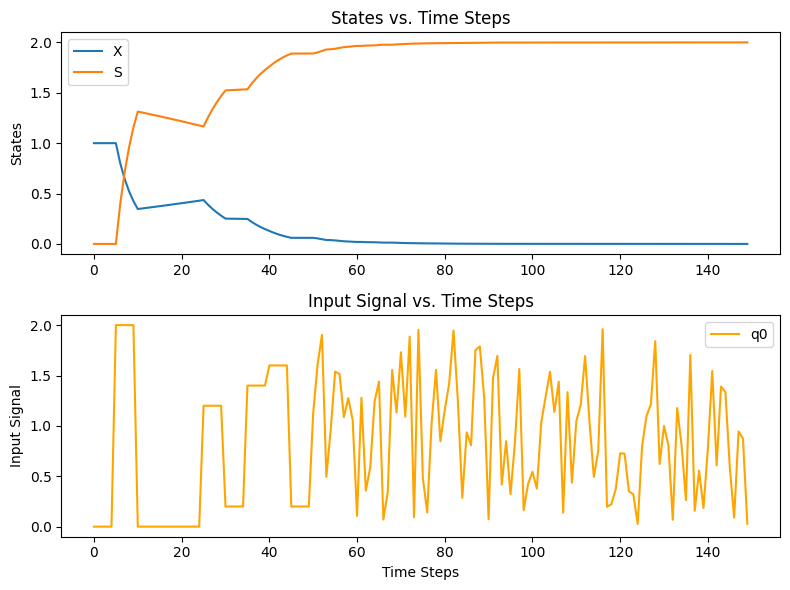

In [111]:

# Time steps
SIM_TIME = np.size(system_input, 1)
time_steps = np.arange(SIM_TIME)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# First subplot: states vs. time steps
axes[0].plot(time_steps, states[0, :], label="X")
axes[0].plot(time_steps, states[1, :], label="S")
axes[0].set_title("States vs. Time Steps")
axes[0].set_ylabel("States")
axes[0].legend()


# Second subplot: input signal vs. time steps
axes[1].plot(time_steps, system_input[0, :], label="q0", color="orange")
axes[1].set_title("Input Signal vs. Time Steps")
axes[1].set_xlabel("Time Steps")
axes[1].set_ylabel("Input Signal")
axes[1].legend()


# Adjust layout and show the plot
plt.tight_layout()
plt.show()
